In [ ]:
import tensorflow as tf
import os, shutil
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original_dataset_dir = '/content/drive/MyDrive/data binary'
base_dir = '/content/drive/MyDrive/data binary'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
conv_base = tf.keras.applications.EfficientNetB0(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 256, 256, 3)  0           ['normalization[0][0

In [ ]:
%%time
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 1280))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:

            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4558)
validation_features, validation_labels = extract_features(validation_dir, 1302)
test_features, test_labels = extract_features(test_dir, 652)

Found 4558 images belonging to 2 classes.
1/1 [==============================] - 1s 566ms/step
Found 1301 images belonging to 2 classes.
1/1 [==============================] - 1s 533ms/step
Found 652 images belonging to 2 classes.
1/1 [==============================] - 1s 542ms/step
CPU times: user 5min 27s, sys: 9.23 s, total: 5min 36s
Wall time: 29min 29s


In [ ]:
train_features = np.reshape(train_features, (4558, 8 * 8 * 1280))
validation_features = np.reshape(validation_features, (1302, 8 * 8 * 1280))
test_features = np.reshape(test_features, (652, 8 * 8 * 1280))

In [ ]:
%%time
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=8 * 8 * 1280))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
228/228 [==============================] - 5s 19ms/step - loss: 0.7241 - acc: 0.4943 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 2/30
228/228 [==============================] - 3s 15ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 3/30
228/228 [==============================] - 3s 15ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 4/30
228/228 [==============================] - 3s 15ms/step - loss: 0.6931 - acc: 0.4886 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 5/30
228/228 [==============================] - 3s 15ms/step - loss: 0.6931 - acc: 0.4925 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 6/30
228/228 [==============================] - 3s 15ms/step - loss: 0.6931 - acc: 0.4952 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 7/30
228/228 [==============================] - 3s 15ms/step - loss: 0.6931 - acc: 0.4917 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 8/30
228/228 [==============================] - 3s 15ms/step - 

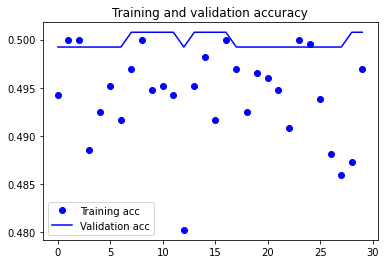

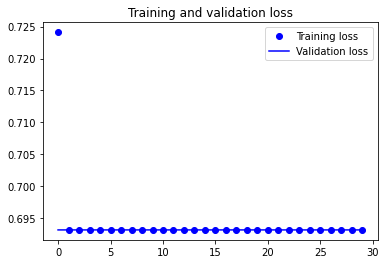

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/data binary/binary_1().h5')

In [ ]:
pred = model.predict(test_features)

21/21 [==============================] - 0s 5ms/step


In [ ]:
predicted_classes = np.argmax(pred, axis = 1)
print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(test_labels, predicted_classes)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       326
         1.0       0.00      0.00      0.00       326

    accuracy                           0.50       652
   macro avg       0.25      0.50      0.33       652
weighted avg       0.25      0.50      0.33       652



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
